In [26]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
%matplotlib inline

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [20]:
runs = 100

In [21]:
modularities = pickle.load(open('../modularities', 'rb'))
print(modularities)

{'Louvain_mu_0_1': 0.6941487433314519, 'Louvain_mu_0_15': 0.6062023756027013, 'Louvain_mu_0_2': 0.5327415977211956, 'Louvain_mu_0_25': 0.4783819226049455, 'Louvain_mu_0_3': 0.40175272896618, 'Louvain_mu_0_35': 0.3457844161348528, 'Louvain_mu_0_4': 0.2925692337714083, 'Louvain_email_eu_core': 0.43065868718804845, 'Infomap_mu_0_1': 0.6941567568471861, 'Infomap_mu_0_15': 0.6062023756027013, 'Infomap_mu_0_2': 0.5327722257767757, 'Infomap_mu_0_25': 0.4782243938257613, 'Infomap_mu_0_3': 0.3364336020612933, 'Infomap_mu_0_35': 0.0672075322538828, 'Infomap_mu_0_4': 0.0, 'Infomap_email_eu_core': 0.3880165267684059, 'LPA_mu_0_1': 0.693495324282302, 'LPA_mu_0_15': 0.5996687246214276, 'LPA_mu_0_2': 0.4954020410872079, 'LPA_mu_0_25': 0.38685831416764105, 'LPA_mu_0_3': 0.10762553197214801, 'LPA_mu_0_35': 0.012769024822322575, 'LPA_mu_0_4': 0.00010103024183097419, 'LPA_email_eu_core': 0.019975179540011274}


In [27]:
X_train_locs = []
y_train_locs = []

titles = []

for graph in ['_mu_1', '_mu_2', '_mu_3', '_mu_4']:
    for alg in ['Louvain', 'Infomap', 'LPA']:
        X_train_locs.append('../LFR_Graph_Data/1000_Node/{0}_Data/node_x_train{1}.csv'.format(alg, graph))
        y_train_locs.append('../LFR_Graph_Data/1000_Node/{0}_Data/node_y_train{1}.csv'.format(alg, graph))
        modularity_graph = modularity_graph = graph[0:3] + '_0_' + graph.split('_')[-1]
        titles.append(alg + graph + '\nModularity: ' + '{:.5f}'.format(modularities[alg + modularity_graph]))
        
for alg in ['Louvain', 'Infomap', 'LPA']:
    X_train_locs.append('6-email-eu-core/{0}/node_x_train.csv'.format(alg))
    y_train_locs.append('6-email-eu-core/{0}/node_y_train.csv'.format(alg))
    titles.append(alg + graph + '\nModularity: ' + '{:.5f}'.format(modularities[alg + '_email_eu_core']))

cols = ['pink', 'purple', 'green']
alg_cols = cols*5

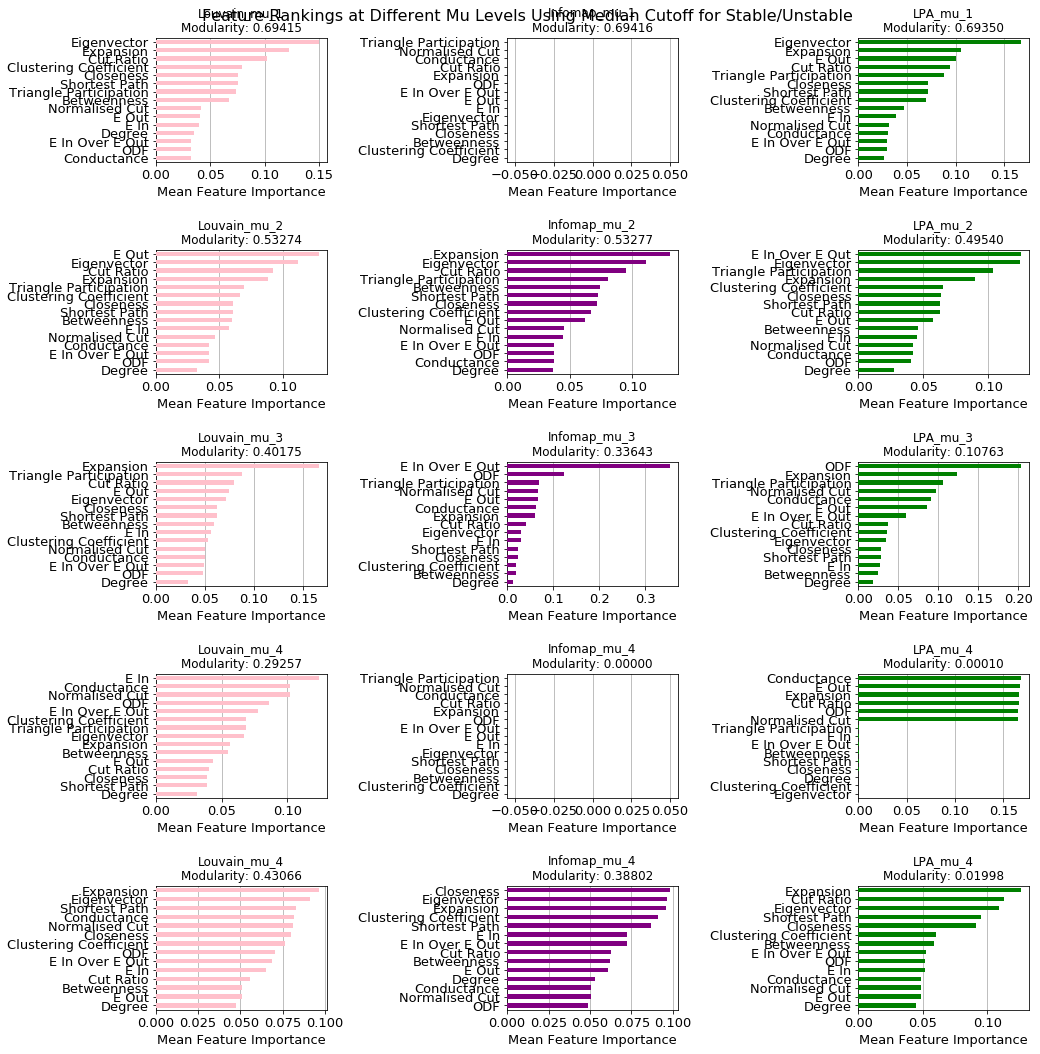

In [28]:
fig = plt.figure(figsize=(30,50))
for exp in range(15):
    
    X_train = pd.read_csv(X_train_locs[exp], index_col=0)
    y_train = pd.read_csv(y_train_locs[exp], index_col=0)
    
    feature_list = list(X_train.columns)
    data = np.array(X_train)
    labels = np.squeeze(np.array(y_train))

    accuracy_scores = []
    feature_importances = {}
    for f in feature_list:
        feature_importances[f] = []
    rows = []

    skf = StratifiedKFold(n_splits=5)
    rf = RandomForestClassifier()

    fold_count = 0

    for run in range(1, runs+1):

        for i in range(5):

            fold_count += 1

            folds = next(skf.split(data, labels), None)

            X_train_fold = data[folds[0], :]
            X_val_fold = data[folds[1], :]
            y_train_fold = labels[folds[0]]
            y_val_fold = labels[folds[1]]

            model = rf.fit(X_train_fold, y_train_fold)
            predictions = rf.predict(X_val_fold)

            accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

            row = {"run": fold_count}
            for j, feature in enumerate(feature_list):
                row[feature] = rf.feature_importances_[j]
            rows.append(row)
    df_importances = pd.DataFrame(rows).set_index("run")
    feature_ranking = df_importances.mean().sort_values(ascending=False)
    ax = fig.add_subplot(5,3,exp+1)
    alg_col = alg_cols[exp]
    feature_ranking[::-1].plot.barh(fontsize=13, figsize=(15,15), color=alg_col, zorder=3)
    ax.set_xlabel("Mean Feature Importance", fontsize=13)
    ax.set_title(titles[exp])
    ax.xaxis.grid()
fig.suptitle('Feature Rankings at Different Mu Levels Using Median Cutoff for Stable/Unstable', fontsize=16)
fig.tight_layout(pad=2)

In [29]:
X_train_locs = []
y_train_locs = []

titles = []

for graph in ['_mu_1', '_mu_2', '_mu_3', '_mu_4']:
    for alg in ['Louvain', 'Infomap', 'LPA']:
        X_train_locs.append('../LFR_Graph_Data/1000_Node/{0}_Data/node_x_train_kmeans{1}.csv'.format(alg, graph))
        y_train_locs.append('../LFR_Graph_Data/1000_Node/{0}_Data/node_y_train_kmeans{1}.csv'.format(alg, graph))
        modularity_graph = modularity_graph = graph[0:3] + '_0_' + graph.split('_')[-1]
        titles.append(alg + graph + '\nModularity: ' + '{:.5f}'.format(modularities[alg + modularity_graph]))
        
for alg in ['Louvain', 'Infomap', 'LPA']:
    X_train_locs.append('6-email-eu-core/{0}/node_x_train_kmeans.csv'.format(alg))
    y_train_locs.append('6-email-eu-core/{0}/node_y_train_kmeans.csv'.format(alg))
    titles.append(alg + graph + '\nModularity: ' + '{:.5f}'.format(modularities[alg + '_email_eu_core']))

cols = ['pink', 'purple', 'green']
alg_cols = cols*5

In [ ]:
fig = plt.figure(figsize=(30,50))
for exp in range(15):
    
    X_train = pd.read_csv(X_train_locs[exp], index_col=0)
    y_train = pd.read_csv(y_train_locs[exp], index_col=0)
    
    feature_list = list(X_train.columns)
    data = np.array(X_train)
    labels = np.squeeze(np.array(y_train))

    accuracy_scores = []
    feature_importances = {}
    for f in feature_list:
        feature_importances[f] = []
    rows = []

    skf = StratifiedKFold(n_splits=5)
    rf = RandomForestClassifier()

    fold_count = 0

    for run in range(1, runs+1):

        for i in range(5):

            fold_count += 1

            folds = next(skf.split(data, labels), None)

            X_train_fold = data[folds[0], :]
            X_val_fold = data[folds[1], :]
            y_train_fold = labels[folds[0]]
            y_val_fold = labels[folds[1]]

            model = rf.fit(X_train_fold, y_train_fold)
            predictions = rf.predict(X_val_fold)

            accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

            row = {"run": fold_count}
            for j, feature in enumerate(feature_list):
                row[feature] = rf.feature_importances_[j]
            rows.append(row)
    df_importances = pd.DataFrame(rows).set_index("run")
    feature_ranking = df_importances.mean().sort_values(ascending=False)
    ax = fig.add_subplot(5,3,exp+1)
    alg_col = alg_cols[exp]
    feature_ranking[::-1].plot.barh(fontsize=13, figsize=(15,15), color=alg_col, zorder=3)
    ax.set_xlabel("Mean Feature Importance", fontsize=13)
    ax.set_title(titles[exp])
    ax.xaxis.grid()
fig.suptitle('Feature Rankings at Different Mu Levels Using k-Means Cutoff for Stable/Unstable', fontsize=16)
fig.tight_layout(pad=2)